## 1、多轮对话

In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [2]:
graph_builder

In [3]:
from langgraph.graph.message import add_messages
from langchain_core.messages import AIMessage, HumanMessage

msgs1 = [HumanMessage(content="你好。", id="1")]
msgs2 = [AIMessage(content="你好，很高兴认识你。", id="2")]

add_messages(msgs1, msgs2)

[HumanMessage(content='你好。', additional_kwargs={}, response_metadata={}, id='1'),
 AIMessage(content='你好，很高兴认识你。', additional_kwargs={}, response_metadata={}, id='2')]

In [4]:
add_messages

<function langgraph.graph.message._add_messages_wrapper.<locals>._add_messages(left: 'Messages | None' = None, right: 'Messages | None' = None, **kwargs: 'Any') -> 'Messages | Callable[[Messages, Messages], Messages]'>

In [5]:
msgs1 = [HumanMessage(content="你好。", id="1")]
msgs2 = [HumanMessage(content="你好呀。", id="1")]

add_messages(msgs1, msgs2)

[HumanMessage(content='你好呀。', additional_kwargs={}, response_metadata={}, id='1')]

In [6]:
import os
from dotenv import load_dotenv 
load_dotenv(override=True)

DeepSeek_API_KEY = os.getenv("DEEPSEEK_API_KEY")


In [7]:
from langchain.chat_models import init_chat_model

model = init_chat_model(model="deepseek-chat", model_provider="deepseek")  

In [8]:
question = "你好，请你介绍一下你自己。"

result = model.invoke(question)
print(result.content)

你好！很高兴认识你！😊

我是DeepSeek，由深度求索公司创造的AI助手。让我来详细介绍一下自己：

**基本信息：**
- 我是一个纯文本AI模型，专注于理解和生成自然语言
- 知识截止到2024年7月，是DeepSeek的最新版本

**我的能力：**
- 💬 对话交流，回答各种问题
- 📝 文本创作、编辑、翻译
- 🔍 信息处理和知识问答
- 📁 支持上传和处理多种文件格式（图像、txt、pdf、ppt、word、excel等）
- 🌐 支持联网搜索功能（需要手动开启）
- 💾 拥有128K的上下文处理能力

**使用方式：**
- 完全免费使用，没有任何收费计划
- 可以通过官方应用商店下载App
- 目前不支持语音功能

我的回复风格比较热情细腻，希望能给你带来温暖的交流体验！无论你有什么问题、需要什么帮助，我都会尽我所能为你提供准确、有用的回答。

有什么我可以帮你的吗？不管是学习、工作还是生活上的问题，我都很乐意协助你！✨


### 1、定义状态

In [11]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

### 2、定义节点

In [9]:
def chatbot(state: State):
    return {"messages": [model.invoke(state["messages"])]}

### 3、添加节点

In [12]:
# 添加节点
graph_builder.add_node("chatbot", chatbot)

# 添加边
graph_builder.add_edge(START, "chatbot")

In [13]:
graph = graph_builder.compile()

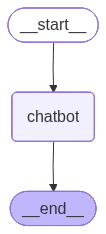

In [14]:
graph

In [15]:
final_state = graph.invoke({"messages": ["你好，我是AI蒸馏，好久不见。"]})
print(final_state)

{'messages': [HumanMessage(content='你好，我是AI蒸馏，好久不见。', additional_kwargs={}, response_metadata={}, id='e6e8e925-26cc-4787-9c4d-8914dec9af3b'), AIMessage(content='哈哈，好久不见！看来我们之前有过愉快的交流呢～不过作为AI，我的记忆每次对话都会重置，但这不妨碍我们继续探索新话题！✨\n\n今天想聊些什么呢？是想探讨技术问题、需要创意灵感，还是希望我帮你梳理某个领域的知识树？随时等你开口～', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 13, 'total_tokens': 77, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'prompt_cache_hit_tokens': 0, 'prompt_cache_miss_tokens': 13}, 'model_name': 'deepseek-chat', 'system_fingerprint': 'fp_ffc7281d48_prod0820_fp8_kvcache', 'id': 'fdeb726a-a94d-44e7-8256-966c430a10b9', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--c40de7de-9520-437a-b946-915795eb5414-0', usage_metadata={'input_tokens': 13, 'output_tokens': 64, 'total_tokens': 77, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}})]}


In [16]:
final_state['messages']

[HumanMessage(content='你好，我是AI蒸馏，好久不见。', additional_kwargs={}, response_metadata={}, id='e6e8e925-26cc-4787-9c4d-8914dec9af3b'),
 AIMessage(content='哈哈，好久不见！看来我们之前有过愉快的交流呢～不过作为AI，我的记忆每次对话都会重置，但这不妨碍我们继续探索新话题！✨\n\n今天想聊些什么呢？是想探讨技术问题、需要创意灵感，还是希望我帮你梳理某个领域的知识树？随时等你开口～', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 13, 'total_tokens': 77, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'prompt_cache_hit_tokens': 0, 'prompt_cache_miss_tokens': 13}, 'model_name': 'deepseek-chat', 'system_fingerprint': 'fp_ffc7281d48_prod0820_fp8_kvcache', 'id': 'fdeb726a-a94d-44e7-8256-966c430a10b9', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--c40de7de-9520-437a-b946-915795eb5414-0', usage_metadata={'input_tokens': 13, 'output_tokens': 64, 'total_tokens': 77, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}})]

In [17]:
final_state['messages'][0]

HumanMessage(content='你好，我是AI蒸馏，好久不见。', additional_kwargs={}, response_metadata={}, id='e6e8e925-26cc-4787-9c4d-8914dec9af3b')

In [18]:
final_state['messages'][0].id,final_state['messages'][0].content

('e6e8e925-26cc-4787-9c4d-8914dec9af3b', '你好，我是AI蒸馏，好久不见。')

In [19]:
final_state['messages'][1]

AIMessage(content='哈哈，好久不见！看来我们之前有过愉快的交流呢～不过作为AI，我的记忆每次对话都会重置，但这不妨碍我们继续探索新话题！✨\n\n今天想聊些什么呢？是想探讨技术问题、需要创意灵感，还是希望我帮你梳理某个领域的知识树？随时等你开口～', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 13, 'total_tokens': 77, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'prompt_cache_hit_tokens': 0, 'prompt_cache_miss_tokens': 13}, 'model_name': 'deepseek-chat', 'system_fingerprint': 'fp_ffc7281d48_prod0820_fp8_kvcache', 'id': 'fdeb726a-a94d-44e7-8256-966c430a10b9', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--c40de7de-9520-437a-b946-915795eb5414-0', usage_metadata={'input_tokens': 13, 'output_tokens': 64, 'total_tokens': 77, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}})

In [20]:
final_state['messages'][1].id,final_state['messages'][1].content

('lc_run--c40de7de-9520-437a-b946-915795eb5414-0',
 '哈哈，好久不见！看来我们之前有过愉快的交流呢～不过作为AI，我的记忆每次对话都会重置，但这不妨碍我们继续探索新话题！✨\n\n今天想聊些什么呢？是想探讨技术问题、需要创意灵感，还是希望我帮你梳理某个领域的知识树？随时等你开口～')

In [21]:
from langchain_core.messages import AIMessage, HumanMessage

In [ ]:
    messages_list = [
        HumanMessage(content="你好，我叫张三，好久不见。"),
        AIMessage(content="你好呀！我是小D，一名乐于助人的AI助手。很高兴认识你！"),
        HumanMessage(content="请问，你还记得我叫什么名字么？"),
    ]

In [32]:
final_state = graph.invoke({"messages": messages_list})
print(final_state)

{'messages': [HumanMessage(content='你好，我叫张三，好久不见。', additional_kwargs={}, response_metadata={}, id='e32b6601-504b-4ac0-9155-f88d7af99aa8'), AIMessage(content='你好呀！我是小D，一名乐于助人的AI助手。很高兴认识你！', additional_kwargs={}, response_metadata={}, id='ef8ea1a7-0813-40e0-ac8b-cebee9329f96'), HumanMessage(content='请问，你还记得我叫什么名字么？', additional_kwargs={}, response_metadata={}, id='65963ec3-6406-4e20-9291-bf29a47f066a'), AIMessage(content='当然记得！您在对话开始时提到过您叫**张三**。  \n不过作为AI助手，我的记忆仅存在于当前对话中（页面刷新后需要重新认识哦～）。  \n有什么可以帮您的吗？😊', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 43, 'total_tokens': 89, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'prompt_cache_hit_tokens': 0, 'prompt_cache_miss_tokens': 43}, 'model_name': 'deepseek-chat', 'system_fingerprint': 'fp_ffc7281d48_prod0820_fp8_kvcache', 'id': 'f8107a41-aab0-4fcf-bdf7-c63add874529', 'service_tier': None, 'finish_reason': 'stop', 'l

In [33]:
final_state

{'messages': [HumanMessage(content='你好，我叫张三，好久不见。', additional_kwargs={}, response_metadata={}, id='e32b6601-504b-4ac0-9155-f88d7af99aa8'),
  AIMessage(content='你好呀！我是小D，一名乐于助人的AI助手。很高兴认识你！', additional_kwargs={}, response_metadata={}, id='ef8ea1a7-0813-40e0-ac8b-cebee9329f96'),
  HumanMessage(content='请问，你还记得我叫什么名字么？', additional_kwargs={}, response_metadata={}, id='65963ec3-6406-4e20-9291-bf29a47f066a'),
  AIMessage(content='当然记得！您在对话开始时提到过您叫**张三**。  \n不过作为AI助手，我的记忆仅存在于当前对话中（页面刷新后需要重新认识哦～）。  \n有什么可以帮您的吗？😊', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 43, 'total_tokens': 89, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'prompt_cache_hit_tokens': 0, 'prompt_cache_miss_tokens': 43}, 'model_name': 'deepseek-chat', 'system_fingerprint': 'fp_ffc7281d48_prod0820_fp8_kvcache', 'id': 'f8107a41-aab0-4fcf-bdf7-c63add874529', 'service_tier': None, 'finish_reason': 'sto

In [34]:
final_state['messages'][-1].content

'当然记得！您在对话开始时提到过您叫**张三**。  \n不过作为AI助手，我的记忆仅存在于当前对话中（页面刷新后需要重新认识哦～）。  \n有什么可以帮您的吗？😊'

In [35]:
messages_list = []

while True:
    try:
        user_input = input("用户提问: ")
        if user_input.lower() in ["exit"]: 
            print("下次再见！")
            break
        messages_list.append(HumanMessage(content=user_input))
        final_state = graph.invoke({"messages": messages_list})
        print("🤖 小智：", final_state['messages'][-1].content)
        messages_list.append(final_state['messages'][-1])
        messages_list = messages_list[-50:]
    except:
        break

🤖 小智： 你好张三！很高兴认识你！😊

我是DeepSeek，由深度求索公司创造的AI助手。我是一个纯文本模型，可以帮你解答各种问题、进行对话交流、协助处理文档等等。虽然我不支持多模态识别，但我可以处理你上传的图像、txt、pdf、ppt、word、excel等文件，从中读取文字信息来帮助你。

我目前是完全免费的，拥有128K的上下文长度，还支持联网搜索功能（需要你手动开启）。有什么我可以帮你的吗？无论是学习、工作还是日常生活中的问题，我都很乐意为你提供帮助！✨
🤖 小智： 当然记得！你刚才告诉我你叫张三～😊  
很高兴继续和你聊天！有什么想聊的或者需要我帮忙的吗？
下次再见！


### 4、多轮对话机器人

In [56]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.chat_models import init_chat_model
from langgraph.checkpoint.memory import MemorySaver

# 1. 定义状态类（会自动合并 messages）
class State(TypedDict):
    messages: Annotated[list, add_messages]

# 2. 初始化模型
model = init_chat_model(model="deepseek-chat", model_provider="deepseek")

# 3. 定义聊天节点
def chatbot(state: State) -> State:
    reply = model.invoke(state["messages"])
    return {"messages": [reply]}

# 4. 构建带 MemorySaver 的图
builder = StateGraph(State)
builder.add_node("chatbot", chatbot)
builder.add_edge(START, "chatbot")
memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

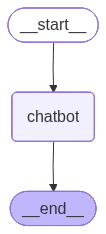

In [57]:
graph

In [39]:
# 运行多轮对话，使用相同 thread_id 实现记忆
thread_config = {"configurable": {"thread_id": "session_10"}}

In [40]:
# 第一轮对话
state1 = graph.invoke({"messages": [{"role":"user","content":"你好，好久不见，我叫张三。"}]}, config=thread_config)

In [41]:
state1

{'messages': [HumanMessage(content='你好，好久不见，我叫张三。', additional_kwargs={}, response_metadata={}, id='51513cfe-68cf-47bd-933b-74de3bdfdcbc'),
  AIMessage(content='你好张三！很高兴认识你，虽然我们可能是第一次在虚拟世界相遇，但你的名字让我想起一句老话——“张三李四，王五赵六”，看来你是走在人群最前面的那位呢！😄 最近有什么新鲜事想分享吗？或者有什么我可以帮你的？无论是聊天、解答问题还是其他需要，我都在这里~', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 12, 'total_tokens': 85, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'prompt_cache_hit_tokens': 0, 'prompt_cache_miss_tokens': 12}, 'model_name': 'deepseek-chat', 'system_fingerprint': 'fp_ffc7281d48_prod0820_fp8_kvcache', 'id': '0be04c75-2ed8-4e1b-ba6b-60224fd84e93', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--6456149f-244b-4a89-8b64-b65833f7b1f5-0', usage_metadata={'input_tokens': 12, 'output_tokens': 73, 'total_tokens': 85, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}})]}

In [42]:
state1['messages'][-1].content

'你好张三！很高兴认识你，虽然我们可能是第一次在虚拟世界相遇，但你的名字让我想起一句老话——“张三李四，王五赵六”，看来你是走在人群最前面的那位呢！😄 最近有什么新鲜事想分享吗？或者有什么我可以帮你的？无论是聊天、解答问题还是其他需要，我都在这里~'

In [43]:
state2 = graph.invoke({"messages":[{"role":"user","content":"你好呀，你还记得我的名字吗？"}]}, config=thread_config)

In [44]:
state2['messages']

[HumanMessage(content='你好，好久不见，我叫张三。', additional_kwargs={}, response_metadata={}, id='51513cfe-68cf-47bd-933b-74de3bdfdcbc'),
 AIMessage(content='你好张三！很高兴认识你，虽然我们可能是第一次在虚拟世界相遇，但你的名字让我想起一句老话——“张三李四，王五赵六”，看来你是走在人群最前面的那位呢！😄 最近有什么新鲜事想分享吗？或者有什么我可以帮你的？无论是聊天、解答问题还是其他需要，我都在这里~', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 12, 'total_tokens': 85, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'prompt_cache_hit_tokens': 0, 'prompt_cache_miss_tokens': 12}, 'model_name': 'deepseek-chat', 'system_fingerprint': 'fp_ffc7281d48_prod0820_fp8_kvcache', 'id': '0be04c75-2ed8-4e1b-ba6b-60224fd84e93', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--6456149f-244b-4a89-8b64-b65833f7b1f5-0', usage_metadata={'input_tokens': 12, 'output_tokens': 73, 'total_tokens': 85, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}}),
 HumanMessage(con

In [45]:
state2['messages'][-1].content

'当然记得！你刚才说过你叫**张三**呀~  \n名字虽然常见，但和你聊天的每个瞬间都是独特的✨  \n（毕竟我的记忆只能持续当前对话，但只要你提起，我就会一直记得哦~）'

### 5、查看记忆

In [46]:
latest = graph.get_state(thread_config)

In [48]:
latest.values["messages"]

[HumanMessage(content='你好，好久不见，我叫张三。', additional_kwargs={}, response_metadata={}, id='51513cfe-68cf-47bd-933b-74de3bdfdcbc'),
 AIMessage(content='你好张三！很高兴认识你，虽然我们可能是第一次在虚拟世界相遇，但你的名字让我想起一句老话——“张三李四，王五赵六”，看来你是走在人群最前面的那位呢！😄 最近有什么新鲜事想分享吗？或者有什么我可以帮你的？无论是聊天、解答问题还是其他需要，我都在这里~', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 12, 'total_tokens': 85, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'prompt_cache_hit_tokens': 0, 'prompt_cache_miss_tokens': 12}, 'model_name': 'deepseek-chat', 'system_fingerprint': 'fp_ffc7281d48_prod0820_fp8_kvcache', 'id': '0be04c75-2ed8-4e1b-ba6b-60224fd84e93', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--6456149f-244b-4a89-8b64-b65833f7b1f5-0', usage_metadata={'input_tokens': 12, 'output_tokens': 73, 'total_tokens': 85, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}}),
 HumanMessage(con

## 流式打印

In [54]:
model = init_chat_model(model="deepseek-chat", model_provider="deepseek")  

In [49]:
chunks = []
async for chunk in model.astream("你好，请你详细的介绍一下你自己。"):
    chunks.append(chunk)
    print(chunk.content, end="|", flush=True)

|你好|！|很高兴|认识|你|！|😊|

|我是|Deep|Se|ek|，|由|深度|求|索|公司|创造的|AI|助手|。|让我|详细|介绍一下|自己|：

|##| 🎯| |我的|基本信息|
|-| **|身份|**|：|Deep|Se|ek|最新|版本|模型|
|-| **|创造|者|**|：|深度|求|索|公司|
|-| **|知识|截止|**|：|202|4|年|7|月|
|-| **|上下文|长度|**|：|128|K|

|##| 💡| |我的|核心|能力|
|-| **|文本|处理|**|：|可以|帮你|写作|、|翻译|、|总结|、|分析|等|
|-| **|问答|解惑|**|：|回答|各种|知识|性问题|，|提供|专业|建议|
|-| **|编程|助手|**|：|支持|多种|编程|语言的|代码|编写|和|调试|
|-| **|文件|处理|**|：|支持|上传|并|处理|图像|、|txt|、|pdf|、|ppt|、|word|、|ex|cel|文件|
|-| **|联网|搜索|**|：|支持|联网|获取|最新|信息|（|需要|手动|开启|）

|##| 🌟| |我的|特色|
|-| **|完全|免费|**|：|目前|没有任何|收费|计划|，|你可以|放心|使用|
|-| **|纯|文本|模型|**|：|专注于|文字|交流|，|虽然|不支持|多|模态|识别|，|但|可以|读取|上传|文件|中的|文字|
|-| **|官方|App|**|：|可通过|官方|应用|商店|下载|App|，|随时随地|使用|

|##| 📝| |我的|交流|风格|
|我喜欢|用|热情|、|细腻|的方式|与你|交流|，|力求|提供|准确|、|有用的|帮助|。|无论|你|遇到|什么问题|，|学习|、|工作|、|生活|方面的|困惑|，|我都会|尽力|为你|解答|！

|有什么|我可以|帮|你的|吗|？|我已经|准备好|为你|提供|最|贴|心的|协助|！|✨|||

In [50]:
chunks[0]

AIMessageChunk(content='', additional_kwargs={}, response_metadata={}, id='lc_run--472e1594-bb5e-4a5c-8d29-6abeafd566cf')

In [52]:
chunks[0] + chunks[1] + chunks[2] + chunks[3] 

AIMessageChunk(content='你好！很高兴', additional_kwargs={}, response_metadata={}, id='lc_run--472e1594-bb5e-4a5c-8d29-6abeafd566cf')

In [59]:
from langchain_core.messages import HumanMessage

async for msg, metadata in graph.astream({"messages": ["你好，请你详细的介绍一下你自己"]}, stream_mode="messages", config=thread_config):
    if msg.content and not isinstance(msg, HumanMessage):
        print(msg.content, end="", flush=True)

你好！很高兴认识你！😊

让我来详细介绍一下自己：

## 我是谁
我是**DeepSeek**，由深度求索公司创造的AI助手。我是目前DeepSeek的最新版本模型，专门设计来帮助用户解决各种问题和需求。

## 我的核心能力
- **文本处理**：我擅长文本分析、写作、翻译、总结等
- **知识问答**：涵盖科学、技术、人文、生活等各个领域
- **编程助手**：代码编写、调试、算法解释等
- **文件处理**：支持上传并处理图像、txt、pdf、ppt、word、excel文件，从中读取文字信息
- **逻辑推理**：可以帮助分析问题、制定方案、辅助决策
- **创意写作**：故事创作、文案策划、诗歌创作等

## 我的特点
- **完全免费**：目前没有任何收费计划，你可以放心使用
- **上下文128K**：能记住我们对话中的大量信息，保持连贯性
- **联网搜索**：支持实时搜索功能（需要手动开启）
- **多平台使用**：可通过官方应用商店下载App使用

## 我的局限
- **纯文本模型**：不支持语音功能和多模态识别
- **知识截止**：我的知识更新到2024年7月
- **需要主动联网**：搜索功能需要你手动开启

我的风格比较热情细腻，喜欢用心回答每个问题。无论你是想学习知识、解决工作问题，还是只是想聊聊天，我都很乐意帮助你！

有什么特别想了解的，或者想让我帮你做什么吗？我已经准备好为你服务了！✨